In [1]:
#!pip uninstall tensorflow 
!pip install tensorflow==1.15.0

In [2]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(tf.__version__)

1.15.0


# Configuration

In [89]:
# Configuration
CLASS_NUMBER = 11
WINDOW_SIZE = 60
TRAIN_TEST_RATIO = 0.2

# Dataset

In [90]:
class_names = ['washingHand', 'brushingTooth', 'drinking', 'washingFace', 'washingHair', 'running', 'dryingHair','sitting','standing','walking','nothing']

In [91]:
fileNamesZYX = ['0washingHand0-1.csv',   '0washingHand0-2.csv',  '0washingHand0-3.csv',  '0washingHand0-4.csv',  '0washingHand0-5.csv',
            '0brushingTooth1-1.csv', '0brushingTooth1-2.csv','0brushingTooth1-3.csv','0brushingTooth1-4.csv','0brushingTooth1-5.csv',
            '0drinking2-1.csv',      '0drinking2-2.csv',     '0drinking2-3.csv',     '0drinking2-4.csv',     '0drinking2-5.csv',
            '0washingFace3-1.csv', '0washingFace3-2.csv',  '0washingFace3-3.csv',  '0washingFace3-4.csv',  '0washingFace3-5.csv','0washingFace3-5.csv',
            '0washingHair4-1.csv',   '0washingHair4-2.csv',  '0washingHair4-3.csv',  '0washingHair4-4.csv',  '0washingHair4-5.csv',
            '0running5-1.csv',       '0running5-2.csv',      '0running5-3.csv',      '0running5-4.csv',      '0running5-5.csv',
            '0dryingHair6-1.csv',    '0dryingHair6-2.csv',   '0dryingHair6-3.csv',   '0dryingHair6-4.csv',   '0dryingHair6-5.csv',
            '0sitting7-1.csv',       '0sitting7-2.csv',      '0sitting7-3.csv',      '0sitting7-4.csv',      '0sitting7-5.csv',
            '0standing8-1.csv',      '0standing8-2.csv',     '0standing8-3.csv',     '0standing8-4.csv',     '0standing8-5.csv',
            '0walking9-1.csv',       '0walking9-2.csv',      '0walking9-3.csv',      '0walking9-4.csv',      '0walking9-5.csv',
            '2nothing1.csv','2nothing2.csv','0nothing10-1.csv','0nothing10-2.csv','0nothing10-3.csv']

fileNamesZBS = ['1washingHand0-1.csv', '1washingHand0-2.csv','1washingHand0-3.csv','1washingHand0-4.csv','1washingHand0-5.csv',
            '1brushingTooth1-1.csv','1brushingTooth1-2.csv','1brushingTooth1-3.csv','1brushingTooth1-4.csv','1brushingTooth1-5.csv',
            '1drinking2-1.csv','1drinking2-2.csv','1drinking2-3.csv','1drinking2-4.csv','1drinking2-5.csv',
            '0washingFace3-1.csv', '0washingFace3-2.csv','1washingFace3-3.csv','1washingFace3-4.csv','1washingFace3-5.csv','1washingFace3-6.csv',
            '1washingHair4-1.csv','1washingHair4-2.csv','1washingHair4-3.csv','1washingHair4-4.csv','1washingHair4-5.csv',
            '1running5-1.csv', '1running5-2.csv','1running5-3.csv','1running5-4.csv','1running5-5.csv',
            '1dryingHair6-1.csv','1dryingHair6-2.csv','1dryingHair6-3.csv','1dryingHair6-4.csv','1dryingHair6-5.csv',
            '1sitting7-1.csv','1sitting7-2.csv','1sitting7-3.csv','1sitting7-4.csv','1sitting7-5.csv',
            '1standing8-1.csv','1standing8-2.csv','1standing8-3.csv','1standing8-4.csv','1standing8-5.csv',
            '1walking9-1.csv','1walking9-2.csv','1walking9-3.csv','1walking9-4.csv','1walking9-5.csv',
            '2nothing1.csv','2nothing2.csv','1nothing10-1.csv','1nothing10-2.csv','1nothing10-3.csv']

fileNamesWSX = ['2washingHand0-1.csv', '2washingHand0-2.csv','2washingHand0-3.csv','2washingHand0-4.csv','2washingHand0-5.csv',
            '2brushingTooth1-1.csv','2brushingTooth1-2.csv','2brushingTooth1-3.csv','2brushingTooth1-4.csv','2brushingTooth1-5.csv',
            '2drinking2-1.csv','2drinking2-2.csv','2drinking2-3.csv','2drinking2-4.csv','2drinking2-5.csv',
            '0washingFace3-1.csv', '0washingFace3-2.csv','2washingFace3-3.csv','2washingFace3-4.csv','2washingFace3-5.csv','2washingFace3-6.csv',
            '2washingHair4-1.csv','2washingHair4-2.csv','2washingHair4-3.csv','2washingHair4-4.csv','2washingHair4-5.csv',
            '2running5-1.csv', '2running5-2.csv','2running5-3.csv','2running5-4.csv','2running5-5.csv',
            '2dryingHair6-1.csv','2dryingHair6-2.csv','2dryingHair6-3.csv','2dryingHair6-4.csv','2dryingHair6-5.csv',
            '2sitting7-1.csv','2sitting7-2.csv','2sitting7-3.csv','2sitting7-4.csv','2sitting7-5.csv',
            '2standing8-1.csv','2standing8-2.csv','2standing8-3.csv','2standing8-4.csv','2standing8-5.csv',
            '2walking9-1.csv','2walking9-2.csv','2walking9-3.csv','2walking9-4.csv','2walking9-5.csv',
            '2nothing1.csv','2nothing2.csv','2nothing10-3.csv','1nothing10-2.csv','1nothing10-3.csv']


In [92]:
classNumbersZYX = [0,0,0,0,0, 1,1,1,1,1, 2,2,2,2,2, 3,3,3,3,3, 4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6, 7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10]
classNumbersZBS = [0,0,0,0,0, 1,1,1,1,1, 2,2,2,2,2, 3,3,3,3,3, 4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6, 7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10]
classNumbersWSX = [0,0,0,0,0, 1,1,1,1,1, 2,2,2,2,2, 3,3,3,3,3, 4,4,4,4,4, 5,5,5,5,5,5, 6,6,6,6,6, 7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,10,10,10,10,10]

In [93]:
def my_load_dataset_class(_fileName, _classNum):
  csv_data = np.loadtxt(_fileName, delimiter=",", dtype=np.float32)
  temp_array = []

  for i in range(len(csv_data)-WINDOW_SIZE):
    temp_array.append(csv_data[i:i+WINDOW_SIZE,:])
  temp_X = np.array(temp_array)
  
  temp_Y = np.full(len(temp_X), _classNum)
  #return choice_train_test_split(temp_X, temp_Y)
  return train_test_split(temp_X, temp_Y, test_size=TRAIN_TEST_RATIO, shuffle=False, random_state=1004)

def my_load_dataset(fileName, classNumber):
  trainX, testX, trainY, testY = my_load_dataset_class(fileName[0], 0)
  for i in range(len(fileName)):
    tempTrainX, tempTestX, tempTrainY, tempTestY = my_load_dataset_class(fileName[i], classNumber[i])
    trainX = np.concatenate((trainX,tempTrainX),axis=0)
    trainY = np.concatenate((trainY, tempTrainY), axis=0)
    testX = np.concatenate((testX, tempTestX), axis=0)
    testY = np.concatenate((testY, tempTestY), axis=0)
  return trainX, testX, trainY, testY

In [94]:
# set0: For Simple Neural Network
train_images0, test_images0, train_labels0, test_labels0 = my_load_dataset(fileNamesZYX, classNumbersZYX)
train_images1, test_images1, train_labels1, test_labels1 = my_load_dataset(fileNamesZBS, classNumbersZBS)
train_images2, test_images2, train_labels2, test_labels2 = my_load_dataset(fileNamesWSX, classNumbersWSX)

'''
# set1: For CNN
train_images1 = train_images0[:]
test_images1 = test_images0[:]
train_labels1 = train_labels0[:]
test_labels1 = test_labels0[:]

# set2: For LSTM
train_images2 = train_images0[:]
test_images2 = test_images0[:]
train_labels2 = train_labels0[:]
test_labels2 = test_labels0[:]
'''
print(len(train_images0))
print(len(train_images1))
print(len(train_images2))

91666
90144
87461


三人数据整合

In [95]:
train_images0_1=np.concatenate((train_images0,train_images1),axis=0)
train_labels0_1=np.concatenate((train_labels0,train_labels1),axis=0)
train_images0_2=np.concatenate((train_images0,train_images2),axis=0)
train_labels0_2=np.concatenate((train_labels0,train_labels2),axis=0)
train_images1_2=np.concatenate((train_images1,train_images2),axis=0)
train_labels1_2=np.concatenate((train_labels1,train_labels2),axis=0)


In [96]:
train_images0_1 = train_images0_1.reshape((len(train_images0_1), WINDOW_SIZE, 6, 1))
train_images0_2 = train_images0_2.reshape((len(train_images0_2), WINDOW_SIZE, 6, 1))
train_images1_2 = train_images1_2.reshape((len(train_images1_2), WINDOW_SIZE, 6, 1))

In [97]:
test_images0 = test_images0.reshape((len(test_images0),WINDOW_SIZE,6,1))
test_images1 = test_images1.reshape((len(test_images1),WINDOW_SIZE,6,1))
test_images2 = test_images2.reshape((len(test_images2),WINDOW_SIZE,6,1))

In [362]:
train_images0_1_2 = np.concatenate((train_images0_1,train_images2),axis=0)
train_labels0_1_2 = np.concatenate((train_labels0_1,train_labels2),axis=0)

ValueError: ignored

In [ ]:
train_images0_1_2 = train_images0_1_2.reshape((len(train_images0_1_2), WINDOW_SIZE, 6, 1))


# SIMPLE NEURAL NETWORK
using dataset0 and model0

In [ ]:
model0 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30, 6)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(CLASS_NUMBER, activation='softmax')
])

In [ ]:
model0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model0.summary()

In [ ]:
model0.fit(train_images0, train_labels0, epochs=5)

In [ ]:
test_loss, test_acc = model0.evaluate(test_images0, test_labels0, verbose=2)

print('\nTest Accuracy: ', test_acc)

In [ ]:
# Look at confusion matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix(sample nn)', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
  	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    con_mat_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]     # 归一化
    con_mat_norm = np.around(con_mat_norm, decimals=2)
    plt.text(j, i,con_mat_norm[i,j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  	
   

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model0.predict(test_images0)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(train_images, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels0, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))



# Convolutional Neural Network(CNN)
using dataset1 and model1

In [98]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [99]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(WINDOW_SIZE, 6, 1)))
model2.add(layers.MaxPooling2D((2, 1)))
model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(layers.MaxPooling2D((2, 1)))
model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(CLASS_NUMBER, activation='softmax'))

In [100]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 60, 6, 32)         320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 6, 32)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 30, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 6, 64)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 6, 64)         36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 5760)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)             

In [101]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
model2.fit(train_images0_1, train_labels0_1, epochs=5)

Train on 181810 samples
Epoch 1/5
181810/181810 [==============================] - 50s 277us/sample - loss: 0.0891 - acc: 0.9681
Epoch 2/5
181810/181810 [==============================] - 48s 262us/sample - loss: 0.0312 - acc: 0.9860
Epoch 3/5
181810/181810 [==============================] - 47s 260us/sample - loss: 0.0400 - acc: 0.9860
Epoch 4/5
181810/181810 [==============================] - 47s 260us/sample - loss: 0.0317 - acc: 0.9871
Epoch 5/5
181810/181810 [==============================] - 48s 262us/sample - loss: 0.0274 - acc: 0.9879


In [70]:
test_loss, test_acc = model2.evaluate(test_images2,  test_labels2, verbose=2)

21555/21555 - 3s - loss: 24.4650 - acc: 0.5926


In [71]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(WINDOW_SIZE, 6, 1)))
model1.add(layers.MaxPooling2D((2, 1)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 1)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(CLASS_NUMBER, activation='softmax'))
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 90, 6, 32)         320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 45, 6, 32)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 45, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 22, 6, 64)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 6, 64)         36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 8448)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)              

In [72]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model1.fit(train_images0_2, train_labels0_2, epochs=5)

Train on 176391 samples
Epoch 1/5
176391/176391 [==============================] - 53s 303us/sample - loss: 0.0606 - acc: 0.9756
Epoch 2/5
176391/176391 [==============================] - 53s 301us/sample - loss: 0.0384 - acc: 0.9841
Epoch 3/5
176391/176391 [==============================] - 53s 301us/sample - loss: 0.0336 - acc: 0.9860
Epoch 4/5
176391/176391 [==============================] - 53s 301us/sample - loss: 0.0315 - acc: 0.9867
Epoch 5/5
176391/176391 [==============================] - 53s 300us/sample - loss: 0.0261 - acc: 0.9875


In [75]:
test_loss, test_acc = model1.evaluate(test_images1,  test_labels1, verbose=2)

22225/22225 - 3s - loss: 7.4197 - acc: 0.7215


In [76]:
model0 = models.Sequential()
model0.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(WINDOW_SIZE, 6, 1)))
model0.add(layers.MaxPooling2D((2, 1)))
model0.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model0.add(layers.MaxPooling2D((2, 1)))
model0.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model0.add(layers.Flatten())
model0.add(layers.Dense(512, activation='relu'))
model0.add(layers.Dense(128, activation='relu'))
model0.add(layers.Dense(64, activation='relu'))
model0.add(layers.Dense(CLASS_NUMBER, activation='softmax'))
model0.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 90, 6, 32)         320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 45, 6, 32)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 45, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 22, 6, 64)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 6, 64)         36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 8448)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)              

In [77]:
model0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model0.fit(train_images1_2, train_labels1_2, epochs=6)

Train on 174869 samples
Epoch 1/7
174869/174869 [==============================] - 53s 303us/sample - loss: 0.1024 - acc: 0.9784
Epoch 2/7
174869/174869 [==============================] - 53s 301us/sample - loss: 0.1362 - acc: 0.9858
Epoch 3/7
174869/174869 [==============================] - 53s 302us/sample - loss: 0.0560 - acc: 0.9951
Epoch 4/7
174869/174869 [==============================] - 53s 302us/sample - loss: 0.0970 - acc: 0.9887
Epoch 5/7
174869/174869 [==============================] - 53s 302us/sample - loss: 0.0713 - acc: 0.9864
Epoch 6/7
174869/174869 [==============================] - 53s 304us/sample - loss: 0.0028 - acc: 0.9993
Epoch 7/7
174869/174869 [==============================] - 53s 302us/sample - loss: 0.1537 - acc: 0.9718


In [88]:
test_loss, test_acc = model0.evaluate(test_images0,  test_labels0, verbose=2)

22603/22603 - 3s - loss: 72.6875 - acc: 0.7637


In [50]:
print(test_acc)

0.68023133


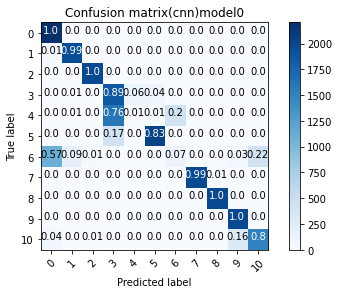

In [86]:
# Look at confusion matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix(cnn)model0', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
  	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    con_mat_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]     # 归一化
    con_mat_norm = np.around(con_mat_norm, decimals=2)
    plt.text(j, i,con_mat_norm[i,j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  	
   

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model0.predict(test_images0)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(train_images, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels0, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(11))




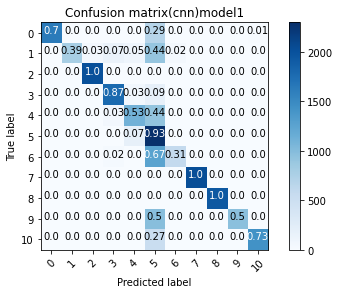

In [53]:
# Look at confusion matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix(cnn)model1', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
  	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    con_mat_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]     # 归一化
    con_mat_norm = np.around(con_mat_norm, decimals=2)
    plt.text(j, i,con_mat_norm[i,j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  	
   

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(test_images1)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(train_images, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels1, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(11))


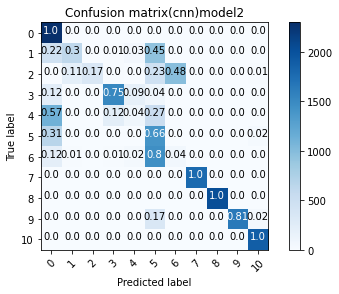

In [54]:
# Look at confusion matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix(cnn)model2', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
  	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    con_mat_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]     # 归一化
    con_mat_norm = np.around(con_mat_norm, decimals=2)
    plt.text(j, i,con_mat_norm[i,j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  	
   

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model2.predict(test_images2)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(train_images, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels2, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(11))


模型保存

In [ ]:
!mkdir -p saved_model

In [ ]:
model1.save('saved_model/my_model') 

# Long Short Term Memory(LSTM)
usind dataset2 and model2

In [ ]:
model2 = keras.Sequential()

model2.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(30, 6))
)
model2.add(layers.Bidirectional(layers.LSTM(32)))
model2.add(layers.Dense(10))

model2.summary()

In [ ]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 30

units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(input_dim, 6))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim, 6)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model


In [ ]:
model2 = build_model(allow_cudnn_kernel=True)

model2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model2.fit(
    train_images2, train_labels2, validation_data=(test_images2, test_labels2), batch_size=batch_size, epochs=10
)

In [ ]:
# Look at confusion matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix(sample nn)', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
  	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  	plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model2.predict(test_images2)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(test_labels, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels2, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))
